<a href="https://colab.research.google.com/github/mohammadbadi/Clustering_Frequency/blob/main/Code%20Sections/5.5%20KMeans%20Feature%20Importance%20%26%205.6%20K-Elbow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **5.5 KMeans Feature Importance & 5.6 K-Elbow - Approach 2**

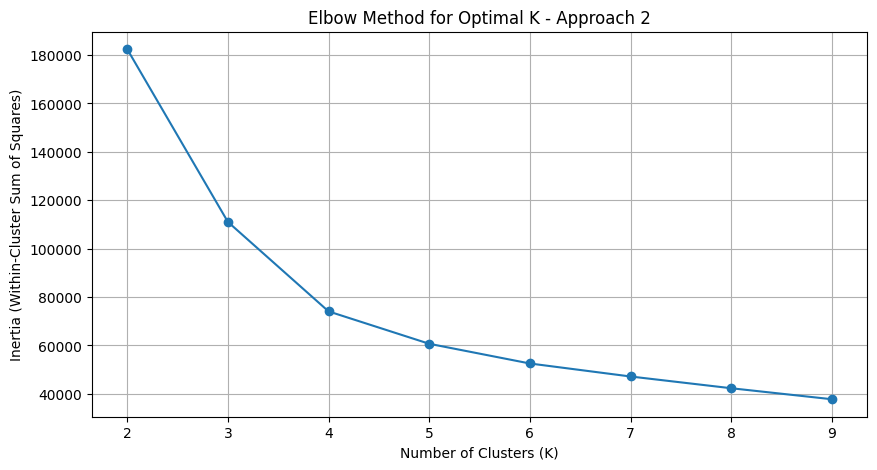

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

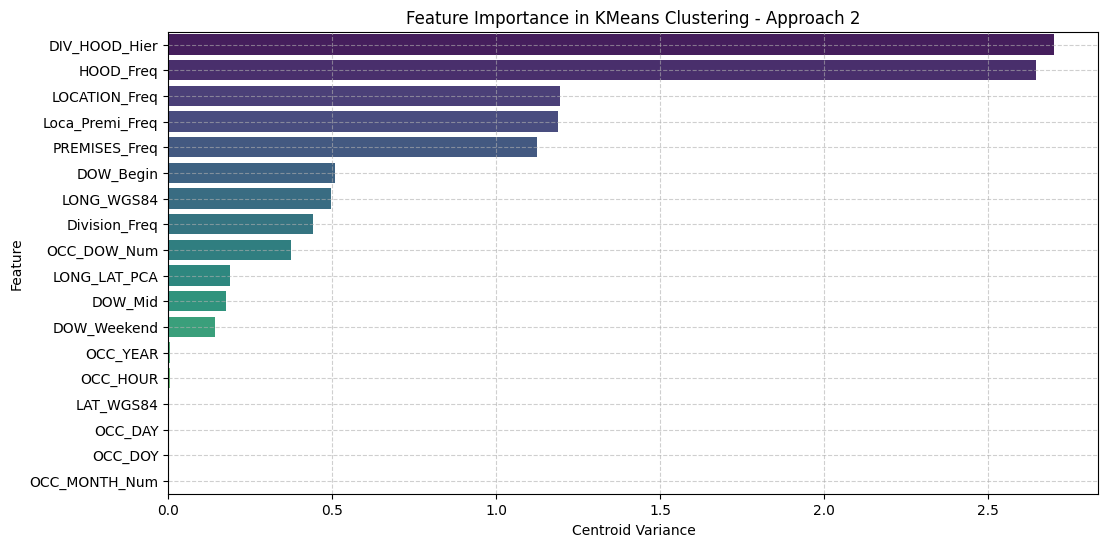

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

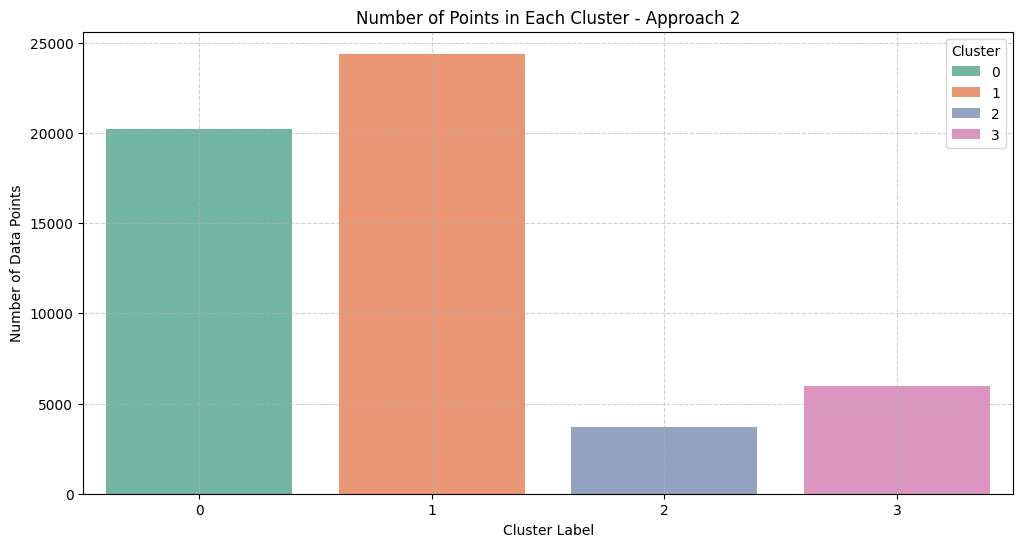

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import warnings, time, itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from IPython.display import display, HTML
from google.colab import files

print("\n\n")
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

                                                                                  # Step 1: Upload and Read Data
url = "https://raw.githubusercontent.com/mohammadbadi/Clustering_Frequency/refs/heads/main/Output_CSV/FE_Encoded_New.csv"
df = pd.read_csv(url)
display(HTML("<p style='color: green; font-size:16px; font-weight:bold;'>Data loaded successfully from FE_Encoded_New.csv.</p>"))
                                                                                  # Step 2: Generate All Valid Feature Combinations
                                                                                  # Base features (always included)
base_features = ["OCC_YEAR", "OCC_DAY", "OCC_DOY", "OCC_MONTH_Num", "OCC_HOUR"]
                                                                                  # Group 1: Temporal Features
group1 = ["OCC_DOW_Num", "DOW_Weekend", "DOW_Begin", "DOW_Mid"]
                                                                                  # Group 2: Spatial Features
group2 = ["LONG_LAT_PCA", "LONG_WGS84", "LAT_WGS84"]
                                                                                  # Group 3
group3 = [ "Division_Freq", "HOOD_Freq", "DIV_HOOD_Hier"]
                                                                                  # Group 4
group4 = [ "LOCATION_Freq", "PREMISES_Freq", "Loca_Premi_Freq"]
features = base_features + group1 + group2 + group3 + group4                      # Final feature set: union of all groups with base features
                                                                                  # Step 3: Build pipeline, Standardize data and perform KMeans
scaler = StandardScaler()
preprocessor = ColumnTransformer([('num', scaler, features)])
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('kmeans', KMeans(n_clusters=4, random_state=42, n_init=10))
])
                                                                                  # Fit pipeline on the dataset
pipeline.fit(df)
df_processed = pipeline.transform(df)
                                                                                  # Extract the fitted KMeans model and assign cluster labels to the dataframe
kmeans = pipeline.named_steps['kmeans']
df['Cluster'] = kmeans.labels_
                                                                                  # Step 4: Compute Clustering Metrics and Feature Importance
                                                                                  # Clustering metrics
sil_score = silhouette_score(df_processed, kmeans.labels_)
db_index = davies_bouldin_score(df_processed, kmeans.labels_)
ch_index = calinski_harabasz_score(df_processed, kmeans.labels_)
inertia_value = kmeans.inertia_
                                                                                  # Compute centroid variance for each feature as a proxy for feature importance
centroids = kmeans.cluster_centers_
centroid_variance = np.var(centroids, axis=0)
importance_df = pd.DataFrame({
    'Feature': features,
    'Centroid Variance': centroid_variance
}).sort_values(by='Centroid Variance', ascending=False)
                                                                                  # Step 5: Plot the K-Elbow Curve (for K values 2 to 9)
inertia_values = []
K_range = range(2, 10)
for k in K_range:
    kmeans_test = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_test.fit(df_processed)
    inertia_values.append(kmeans_test.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(K_range, inertia_values, marker='o', linestyle='-')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (Within-Cluster Sum of Squares)")
plt.title("Elbow Method for Optimal K - Approach 2")
plt.grid(True)
plt.savefig("K-Elbow - Approach 2.png", dpi=300, bbox_inches='tight')
plt.show()
files.download("K-Elbow - Approach 2.png")
display(HTML("<br><br>"))
                                                                                  # Step 6: Plot K-Means Feature Importance
plt.figure(figsize=(12, 6))
sns.barplot(data=importance_df, x='Centroid Variance', y='Feature', palette='viridis')
plt.xlabel("Centroid Variance")
plt.ylabel("Feature")
plt.title("Feature Importance in KMeans Clustering - Approach 2")
plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig("K-Means_Feature_Importance - Approach 2.png", dpi=300, bbox_inches='tight')
plt.show()
files.download("K-Means_Feature_Importance - Approach 2.png")
display(HTML("<br><br>"))
                                                                                  # Step 7: Plot Cluster Distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Cluster', hue='Cluster', palette="Set2", dodge=False)
plt.title("Number of Points in Each Cluster - Approach 2")
plt.xlabel("Cluster Label")
plt.ylabel("Number of Data Points")
plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig("K-Means_Cluster_Distribution - Approach 2.png", dpi=300, bbox_inches='tight')
plt.show()
files.download("K-Means_Cluster_Distribution - Approach 2.png")
display(HTML("<br><br>"))
                                                                                  # Step 8: Build HTML Table for Clustering Analysis Summary
html_table = f"""
<table style='border-collapse: collapse; font-size: 18px; width: 100%; max-width: 900px; table-layout: fixed;'>
    <thead>
        <tr style='background-color: #2f4f4f; color: white;'>
            <th colspan="3" style="text-align: center; font-size: 24px; padding: 8px;">
                KMEANS Clustering Analysis - Approach 2
            </th>
        </tr>
        <tr>
            <td colspan="3" style="border: 1px solid #dddddd; padding: 8px; text-align: center;">
                Based on the K-Elbow method, KMeans was performed with 4 clusters. The clustering metrics are:
                <strong>Silhouette Score:</strong> {sil_score:.2f},
                <strong>Davies-Bouldin Index:</strong> {db_index:.2f},
                <strong>Calinski-Harabasz Index:</strong> {ch_index:.2f}, and
                <strong>Inertia:</strong> {inertia_value:.2f}.
            </td>
        </tr>
        <tr style='background-color: #4CAF50; color: white;'>
            <th style='border: 1px solid #dddddd; padding: 8px;'>S/N</th>
            <th style='border: 1px solid #dddddd; padding: 8px;'>Feature</th>
            <th style='border: 1px solid #dddddd; padding: 8px;'>Centroid Variance</th>
        </tr>
    </thead>
    <tbody>
"""
for idx, row in enumerate(importance_df.itertuples(), start=1):
    html_table += f"""
        <tr style='border: 1px solid #dddddd;'>
            <td style='border: 1px solid #dddddd; padding: 8px; text-align: center;'>{idx}</td>
            <td style='border: 1px solid #dddddd; padding: 8px;'>{row.Feature}</td>
            <td style='border: 1px solid #dddddd; padding: 8px; text-align: right;'>{row[2]:.4f}</td>
        </tr>
    """
html_table += """
    </tbody>
</table>
"""

display(HTML(html_table))
                                                                                  # Step 9: Save the Updated Dataset with Cluster Labels
df.to_csv("FE_Encoded_New_with_Clusters.csv", index=False)
files.download("FE_Encoded_New_with_Clusters.csv")
display(HTML("""
    <p style="color: darkblue; font-size: 18px; font-weight: bold;">
         Updated dataset with cluster labels saved as <span style="color: green; font-weight: bold;">FE_Encoded_New_with_Clusters.csv</span>.
    </p>
"""))